In [595]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
u.ndim = u.dimensionless_unscaled
import skrf as rf
import pandas as pd

In [596]:
#One L-section

In [597]:
X_L = 0*u.ohm # all real
R_L = 1000*u.ohm
Z_0 = 100*u.ohm
f = 75*u.MHz
f_0_str = '500MHz'

In [598]:
B1 = (X_L + np.sqrt(R_L/Z_0)*np.sqrt(R_L**2 + X_L**2 - Z_0*R_L))/(R_L**2 + X_L**2)
B2 = (X_L - np.sqrt(R_L/Z_0)*np.sqrt(R_L**2 + X_L**2 - Z_0*R_L))/(R_L**2 + X_L**2)
X1 = (1/B1) + (X_L*Z_0)/R_L - Z_0/(B1*R_L)
X2 = (1/B2) + (X_L*Z_0)/R_L - Z_0/(B2*R_L)

In [599]:
if B1 > 0:
    print(f"B1 is a capacitor, B1 = {B1:.6f}")
    C1 = B1/(2*np.pi*f)
    print(C1.to(u.pF))
else: 
    print(f"B1 is an inductor, B1 = {B1:.6f}")
    L1 = -1/(2*np.pi*f*B1)
    #print(f"L1 = {L1} H")
if X1 > 0:
    print(f"X1 is an inductor, X1 = {X1:.6f}")
    L2 = (X1)/(2*np.pi*f)
    #print(f"L2 = {L2} H")
    print(L2.to(u.nH))
else:
    print(f"X1 is a capacitor, X1 = {X1:.6f}")
    C2 = -1/(2*np.pi*f*X1*Z_0)
    print(f"C2 = {C2} F")
    
if B2 > 0:
    print(f"B2 is a capacitor, B2 = {B2:.6f}")
    C3 = B2/(2*np.pi*f*Z_0)
    print(f"C3 = {C3} F")
else: 
    print(f"B2 is an inductor, B2 = {B2:.6f}")
    L3 = -1/(2*np.pi*f*B2)
    #print(f"L3 = {L3} H")
    print(L3.to(u.nH))
if X2 > 0:
    print(f"X2 is an inductor, X2 = {X2:.6f}")
    L4 = (X2*Z_0)/(2*np.pi*f)
    print(f"L4 = {L4} H")
else:
    print(f"X2 is a capacitor, X2 = {X2:.6f}")
    C4 = -1/(2*np.pi*f*X2)
    #print(f"C4 = {C4} F")
    print(C4.to(u.pF))

B1 is a capacitor, B1 = 0.003000 1 / Ohm
6.366197723675815 pF
X1 is an inductor, X1 = 300.000000 Ohm
636.6197723675812 nH
B2 is an inductor, B2 = -0.003000 1 / Ohm
707.3553026306457 nH
X2 is a capacitor, X2 = -300.000000 Ohm
7.0735530263064605 pF


In [600]:
frequency = np.arange(1, 151, 1)*u.MHz #Hz
omega = 1j*2*np.pi*frequency
circuit1_Z = omega*L2 + (omega*C1 + 1/R_L)**(-1)
circuit2_Z = 1/(omega*C4) + (1/(omega*L3) + 1/R_L)**(-1)

Reflection1 = np.abs(((circuit1_Z - Z_0)/(circuit1_Z + Z_0)).to(u.ndim))
Reflection2 = np.abs(((circuit2_Z - Z_0)/(circuit2_Z + Z_0)))

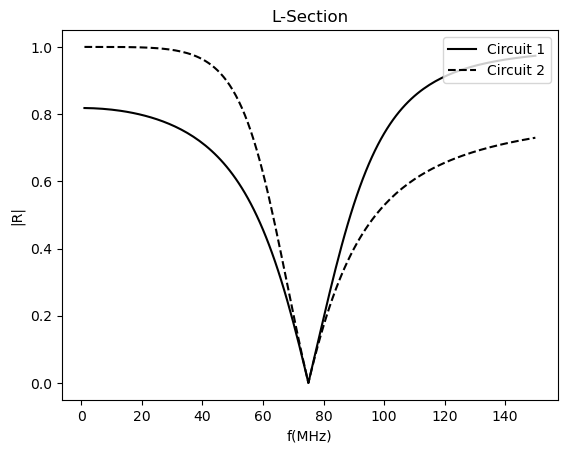

In [601]:
plt.plot(frequency, Reflection1, color='k', linestyle='-', label='Circuit 1')
plt.plot(frequency, Reflection2, color='k', linestyle='--', label='Circuit 2')
plt.ylabel("|R|")
plt.xlabel("f(MHz)")
plt.title("L-Section")
plt.legend(loc="upper right")
plt.show()

In [602]:
Q_s1 = X1/Z_0
Q_p1 = R_L/(1/B1)
Q_s2 = X2/Z_0
Q_p2 = R_L/(1/B2)
Q_s1, Q_p1, Q_s2, Q_p2

(<Quantity 3.>, <Quantity 3.>, <Quantity -3.>, <Quantity -3.>)

In [603]:
# Three element matching -- Pi circuit -- higher Q -- smaller bandwidth

In [604]:
X_L = 0*u.ohm # all real
R_L = 1000*u.ohm
Z_0 = 100*u.ohm
f = 75*u.MHz
Q = 3.1
frequency = np.arange(1, 151, 1)*u.MHz #Hz
omega = 1j*2*np.pi*frequency

In [605]:
#find the virtual resistance
R = R_L/(Q**2 + 1)
R

<Quantity 94.25070688 Ohm>

In [606]:
#side that has the source and then the shunt
X_p2 = R_L/Q
X_s2 = R*Q #virtual resistance takes the source resistances' place
X_p2, X_s2

(<Quantity 322.58064516 Ohm>, <Quantity 292.17719133 Ohm>)

In [607]:
#side that has shunt and then source
Q2 = np.sqrt(Z_0/R - 1)
X_p1 = Z_0/Q2
X_s1 = Q2*R
Q2, X_p1, X_s1

(<Quantity 0.24698178>,
 <Quantity 404.88816509 Ohm>,
 <Quantity 23.27820742 Ohm>)

In [608]:
def parallel(x, y):
    return (1/x + 1/y)**(-1)
def capacitor(x):
    return 1/(omega*x)
def inductor(x):
    return omega*x

In [609]:
#Option 1: P1 is capacitor, S1 is inductor, P2 is capacitor, S2 is inductor
C1 = 1/(1j*2*np.pi*f*X_p1)
opt1_p1 = capacitor(C1)
L1 = X_s1/(1j*2*np.pi*f)
opt1_s1 = inductor(L1)
C2 = 1/(1j*2*np.pi*f*X_p2)
opt1_p2 = capacitor(C2)
L2 = X_s2/(1j*2*np.pi*f)
opt1_s2 = inductor(L2)
sec1 = parallel(opt1_p2, R_L) + opt1_s1 + opt1_s2
option1_Z = parallel(sec1, opt1_p1)
reflection_opt1 = np.abs(((option1_Z - Z_0)/(option1_Z + Z_0)).to(u.ndim))

In [610]:
#Option 2: P1 is capacitor, S1 is inductor, P2 is inductor, S2 is capacitor
C3 = 1/(1j*2*np.pi*f*X_p1)
opt2_p1 = capacitor(C3)
L3 = X_s1/(1j*2*np.pi*f)
opt2_s1 = inductor(L3)
C4 = 1/(1j*2*np.pi*f*X_s2)
opt2_s2 = capacitor(C4)
L4 = X_p2/(1j*2*np.pi*f)
opt2_p2 = inductor(L4)
sec2 = parallel(opt2_p2, R_L) + opt2_s1 + opt2_s2
option2_Z = parallel(sec2, opt2_p1)
reflection_opt2 = np.abs(((option2_Z - Z_0)/(option2_Z + Z_0)).to(u.ndim))

In [611]:
#Option 3: P1 is inductor, S1 is capacitor, P2 is inductor, S2 is capacitor
C5 = 1/(1j*2*np.pi*f*X_s1)
opt3_s1 = capacitor(C5)
L5 = X_p1/(1j*2*np.pi*f)
opt3_p1 = inductor(L5)
C6 = 1/(1j*2*np.pi*f*X_s2)
opt3_s2 = capacitor(C6)
L6 = X_p2/(1j*2*np.pi*f)
opt3_p2 = inductor(L6)
sec3 = parallel(opt3_p2, R_L) + opt3_s1 + opt3_s2
option3_Z = parallel(sec3, opt3_p1)
reflection_opt3 = np.abs(((option3_Z - Z_0)/(option3_Z + Z_0)).to(u.ndim))

In [612]:
#Option 4: P1 is inductor, S1 is capacitor, P2 is capacitor, S2 is inductor
C7 = 1/(1j*2*np.pi*f*X_s1)
opt4_s1 = capacitor(C7)
L7 = X_p1/(1j*2*np.pi*f)
opt4_p1 = inductor(L7)
C8 = 1/(1j*2*np.pi*f*X_p2)
opt4_p2 = capacitor(C8)
L8 = X_s2/(1j*2*np.pi*f)
opt4_s2 = inductor(L8)
sec4 = parallel(opt4_p2, R_L) + opt4_s1 + opt4_s2
option4_Z = parallel(sec4, opt4_p1)
reflection_opt4 = np.abs(((option4_Z - Z_0)/(option4_Z + Z_0)).to(u.ndim))

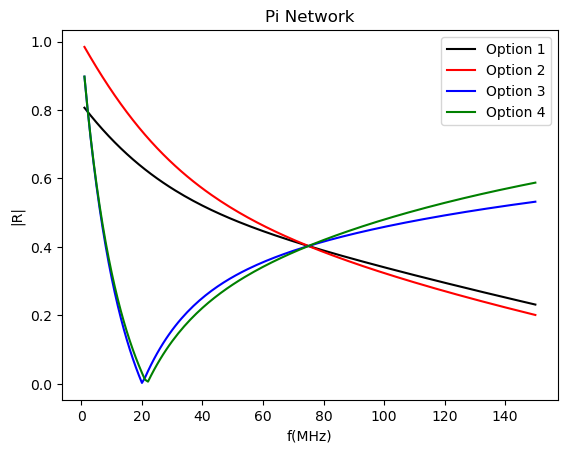

In [613]:
plt.plot(frequency, reflection_opt1, color='k', label='Option 1')
plt.plot(frequency, reflection_opt2, color='r', label='Option 2')
plt.plot(frequency, reflection_opt3, color='b', label='Option 3')
plt.plot(frequency, reflection_opt4, color='g', label='Option 4')
plt.ylabel("|R|")
plt.xlabel("f(MHz)")
plt.title("Pi Network")
plt.legend(loc="upper right")
plt.show()

In [614]:
# Three element matching -- lower Q -- series leg -- wider bandwidth

In [615]:
X_L = 0*u.ohm # all real
R_L = 1000*u.ohm
Z_0 = 100*u.ohm
f = 75*u.MHz
Q = 1.5

In [616]:
#find the virtual resistance
R = R_L/(Q**2 + 1)
R

<Quantity 307.69230769 Ohm>

In [653]:
#side that has the source and then the shunt
X_p2 = R_L/Q
X_s2 = R*Q #virtual resistance takes the source resistances' place
X_p2, X_s2

(<Quantity 666.66666667 Ohm>, <Quantity 461.53846154 Ohm>)

In [618]:
#side that has the source and then the shunt
X_p1 = R/Q
X_s1 = Z_0*Q #virtual resistance takes the source resistances' place
X_p1, X_s1

(<Quantity 205.12820513 Ohm>, <Quantity 150. Ohm>)

In [619]:
#Option 1: P1 is capacitor, S1 is inductor, P2 is capacitor, S2 is inductor
C1 = 1/(1j*2*np.pi*f*X_p1)
opt1_p1 = capacitor(C1)
L1 = X_s1/(1j*2*np.pi*f)
opt1_s1 = inductor(L1)
C2 = 1/(1j*2*np.pi*f*X_p2)
opt1_p2 = capacitor(C2)
L2 = X_s2/(1j*2*np.pi*f)
opt1_s2 = inductor(L2)
sec1 = parallel(opt1_p2, R_L) + opt1_s2
option1_Z = parallel(sec1, opt1_p1) + opt1_s1
reflection_opt1 = np.abs(((option1_Z - Z_0)/(option1_Z + Z_0)).to(u.ndim))

In [620]:
#Option 2: P1 is capacitor, S1 is inductor, P2 is inductor, S2 is capacitor
C3 = 1/(1j*2*np.pi*f*X_p1)
opt2_p1 = capacitor(C3)
L3 = X_s1/(1j*2*np.pi*f)
opt2_s1 = inductor(L3)
C4 = 1/(1j*2*np.pi*f*X_s2)
opt2_s2 = capacitor(C4)
L4 = X_p2/(1j*2*np.pi*f)
opt2_p2 = inductor(L4)
sec2 = parallel(opt2_p2, R_L) + opt2_s2
option2_Z = parallel(sec2, opt2_p1) + opt2_s1
reflection_opt2 = np.abs(((option2_Z - Z_0)/(option2_Z + Z_0)).to(u.ndim))

In [621]:
#Option 3: P1 is inductor, S1 is capacitor, P2 is inductor, S2 is capacitor
C5 = 1/(1j*2*np.pi*f*X_s1)
opt3_s1 = capacitor(C5)
L5 = X_p1/(1j*2*np.pi*f)
opt3_p1 = inductor(L5)
C6 = 1/(1j*2*np.pi*f*X_s2)
opt3_s2 = capacitor(C6)
L6 = X_p2/(1j*2*np.pi*f)
opt3_p2 = inductor(L6)
sec3 = parallel(opt3_p2, R_L) + opt3_s2
option3_Z = parallel(sec3, opt3_p1) + opt3_s1
reflection_opt3 = np.abs(((option3_Z - Z_0)/(option3_Z + Z_0)).to(u.ndim))

In [622]:
#Option 4: P1 is inductor, S1 is capacitor, P2 is capacitor, S2 is inductor
C7 = 1/(1j*2*np.pi*f*X_s1)
opt4_s1 = capacitor(C7)
L7 = X_p1/(1j*2*np.pi*f)
opt4_p1 = inductor(L7)
C8 = 1/(1j*2*np.pi*f*X_p2)
opt4_p2 = capacitor(C8)
L8 = X_s2/(1j*2*np.pi*f)
opt4_s2 = inductor(L8)
sec4 = parallel(opt4_p2, R_L) + opt4_s2
option4_Z = parallel(sec4, opt4_p1) + opt4_s1
reflection_opt4 = np.abs(((option4_Z - Z_0)/(option4_Z + Z_0)).to(u.ndim))

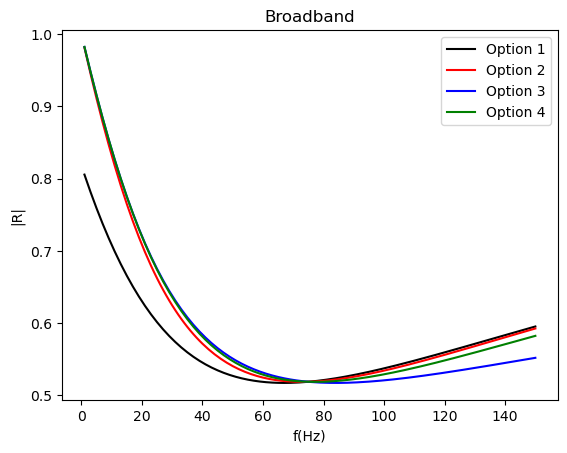

In [623]:
plt.plot(frequency, reflection_opt1, color='k', label='Option 1')
plt.plot(frequency, reflection_opt2, color='r', label='Option 2')
plt.plot(frequency, reflection_opt3, color='b', label='Option 3')
plt.plot(frequency, reflection_opt4, color='g', label='Option 4')
plt.ylabel("|R|")
plt.xlabel("f(Hz)")
plt.title("Broadband")
plt.legend(loc="upper right")
plt.show()